In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import zeta
import networkx as nx

np.random.seed(42)

## Task1

#### Ex. 1

In [11]:
# histogram of normally distributed variable
n = 10000
std = 1.0
x = np.random.normal(loc=0.0, scale=std, size=n)

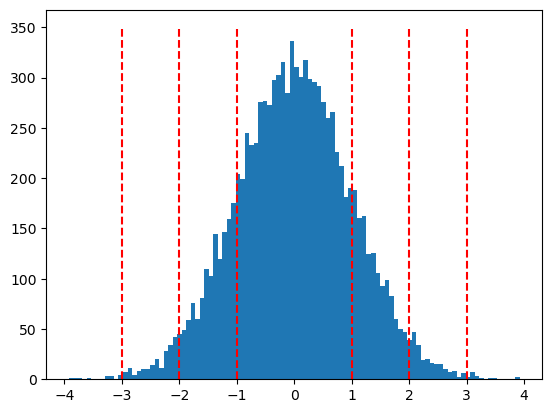

In [12]:
plt.hist(x, bins=100)
plt.vlines(std, 0, 350, colors='red', linestyles='dashed', label='sigma')
plt.vlines(-std, 0, 350, colors='red', linestyles='dashed', label='sigma')
plt.vlines(2*std, 0, 350, colors='red', linestyles='dashed', label='sigma')
plt.vlines(-2*std, 0, 350, colors='red', linestyles='dashed', label='sigma')
plt.vlines(3*std, 0, 350, colors='red', linestyles='dashed', label='sigma')
plt.vlines(-3*std, 0, 350, colors='red', linestyles='dashed', label='sigma')
plt.show()

#### Ex. 2

In [8]:
# Pareto rule for geometric distribution ???
n = 10000
p = 0.5
x = np.random.geometric(p, size=n)
std = np.sqrt((1-p) / p ** 2)
mean = 1 / p

In [22]:
p = 0.2  # geometric distribution parameter
N = 1000  # truncate support to first 1000 terms

# PMF of geometric distribution
k = np.arange(1, N + 1)
pk = (1 - p)**(k - 1) * p

# Normalize just to be safe (numerical stability)
pk /= pk.sum()

# Expected value
E = np.sum(k * pk)

# Sort outcomes by size (descending)
idx = np.argsort(pk)[::-1]
k_sorted = k[idx]
pk_sorted = pk[idx]

# Cumulative contribution to expected value
cum_contrib = np.cumsum(k_sorted * pk_sorted) / E

# Find fraction of outcomes that contribute 80% of expectation
fraction_for_80 = np.searchsorted(cum_contrib, 0.8) / N

print(f"Fraction of largest outcomes (k values) giving 80% of expectation: {fraction_for_80:.3f}")
print(f"Does it match Pareto 80–20 rule? {'Yes' if abs(fraction_for_80 - 0.2) < 0.05 else 'No'}")
# 80% of mass should be covered by 20% of largest/smallest values

Fraction of largest outcomes (k values) giving 80% of expectation: 0.012
Does it match Pareto 80–20 rule? No


In [29]:
np.sum((pk_sorted * k_sorted)[:N//5]) # almost all mass is contained by 20% of largest observations

5.000000000000001

#### Ex. 3

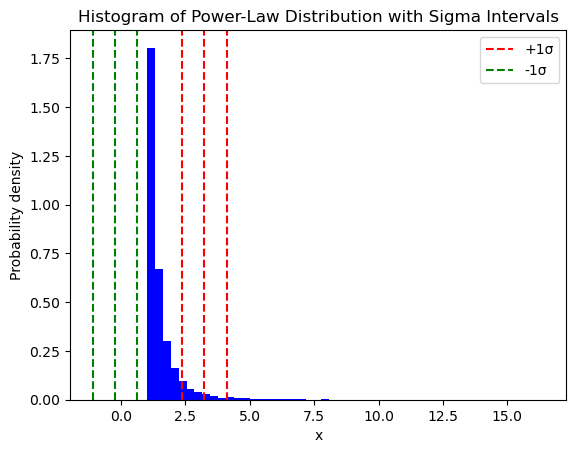

In [46]:
# mean exists if alpha > 2
# variance if alpha > 3

alpha = 4
xmin = 1
N = 10000

# generating uniform samples
u = np.random.uniform(0, 1, N)
# drawing using equation u = F(x) -> x = F^(-1)(u)
x = xmin * (1 - u)**(-1/(alpha - 1))

# computing stats
mu = (alpha - 1) / (alpha - 2) * xmin
sigma = np.sqrt((alpha - 1) / ((alpha - 3)*(alpha - 2)**2) * xmin**2)

plt.hist(x, bins=50, density=True, color='blue')

for k in range(1, 4):
    plt.axvline(mu + k*sigma, color='r', linestyle='--', label=f'+{k}σ' if k==1 else "")
    plt.axvline(mu - k*sigma, color='g', linestyle='--', label=f'-{k}σ' if k==1 else "")

plt.xlabel('x')
plt.ylabel('Probability density')
plt.title('Histogram of Power-Law Distribution with Sigma Intervals')
plt.legend()
plt.show()

#### Ex. 4

In [67]:
# checking Pareto rule for Zeta dist
# k discrete: 1, 2, 3, ...
# s > 1

s = 2.5
k_max = 10000

# computing probability mass
k = np.arange(1, k_max+1)
pk = k**(-s) / zeta(s)

# cumulative sum
cum_pk = np.cumsum(pk)
# normalizing for stability
cum_fraction = cum_pk / cum_pk[-1]

# Find fraction of items contributing 80% probability
index_80 = np.searchsorted(cum_fraction, 0.8)
fraction_items = index_80 / k_max

print(f"Fraction of top items contributing 80% of probability: {fraction_items:.2f}")
print(f"index: {index_80}")
print(f"fraction_items: {fraction_items}")

Fraction of top items contributing 80% of probability: 0.00
index: 1
fraction_items: 0.0001


#### Ex. 5

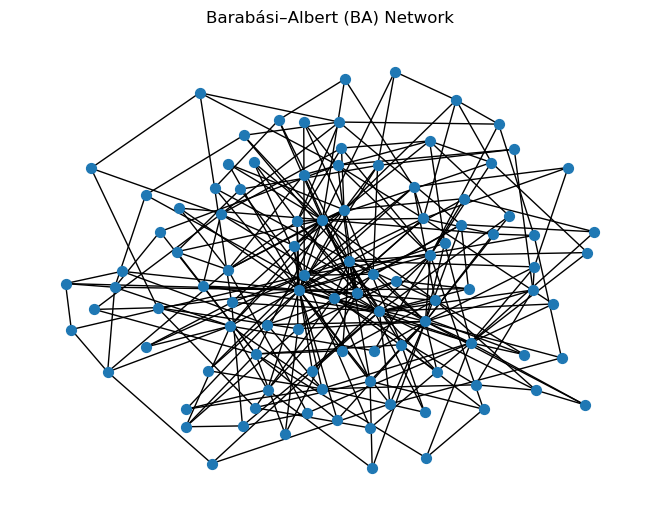

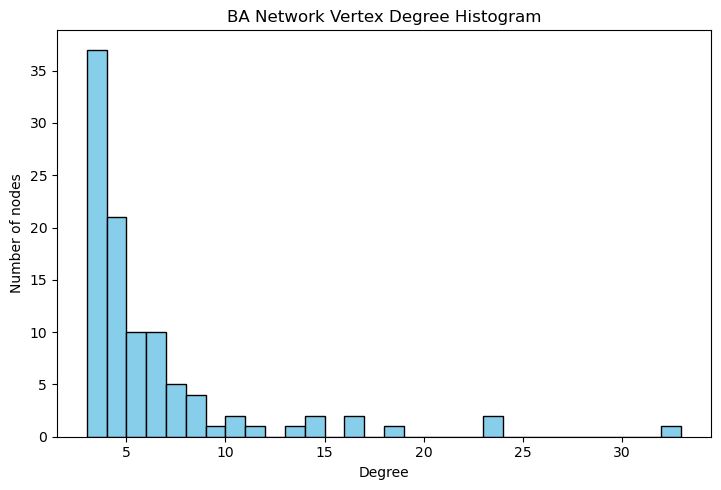

BA Network:
Mean degree: 5.82
Variance of degrees: 23.39



In [80]:
# Barabási–Albert (BA) Network

# nodes
N = 100
# 3 new edges after attaching a new node
m = 3

BA_graph = nx.barabasi_albert_graph(N, m)

nx.draw(BA_graph, node_size=50, with_labels=False)
plt.title("Barabási–Albert (BA) Network")
plt.show()

# hubs - nodes with high degree
# central nodes - hubs

# Compute vertex degrees
BA_degrees = [d for n, d in BA_graph.degree()]

# Plot histograms
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(BA_degrees, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('BA Network Vertex Degree Histogram')

plt.tight_layout()
plt.show()


# mean and variance
BA_mean = np.mean(BA_degrees)
BA_var = np.var(BA_degrees)

print("BA Network:")
print(f"Mean degree: {BA_mean:.2f}")
print(f"Variance of degrees: {BA_var:.2f}\n")

# large variance
# lon tail

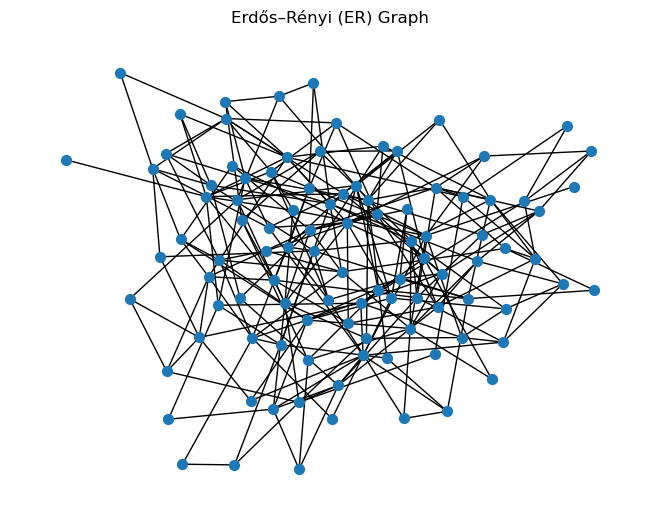

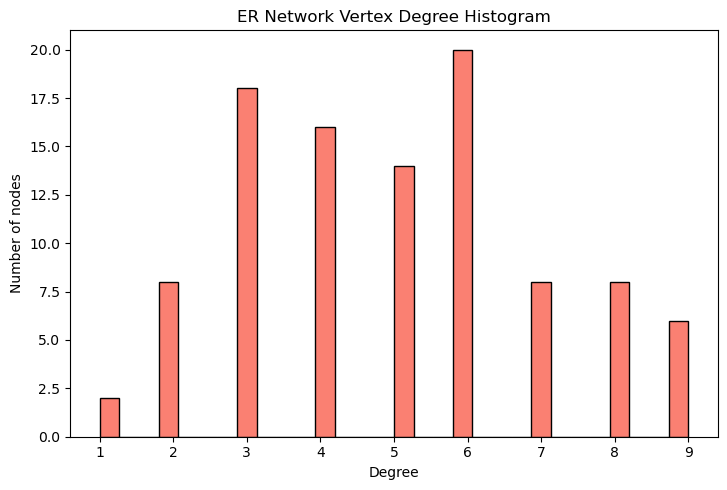

ER Network:
Mean degree: 5.00
Variance of degrees: 4.12


In [81]:
# Erdős–Rényi (ER) Graph

p = 0.05  # probability of edge creation

ER_graph = nx.erdos_renyi_graph(N, p)

nx.draw(ER_graph, node_size=50, with_labels=False)
plt.title("Erdős–Rényi (ER) Graph")
plt.show()

# mainly similar degrees, some hubs in the center

ER_degrees = [d for n, d in ER_graph.degree()]

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.hist(ER_degrees, bins=30, color='salmon', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('ER Network Vertex Degree Histogram')

plt.tight_layout()
plt.show()


ER_mean = np.mean(ER_degrees)
ER_var = np.var(ER_degrees)

print("ER Network:")
print(f"Mean degree: {ER_mean:.2f}")
print(f"Variance of degrees: {ER_var:.2f}")

# smaller variance
# similar means
# most nodes near mean

## Task2